In [86]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kaggle as kaggle
import zipfile as zipfile

In [87]:
#Disable warnings when making changes to the original dataframe
pd.options.mode.chained_assignment = None

In [88]:
#Download dataset from kaggle using the Kaggle API
!kaggle datasets download -d aiaiaidavid/the-big-dataset-of-ultra-marathon-running

Dataset URL: https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running
License(s): CC0-1.0
the-big-dataset-of-ultra-marathon-running.zip: Skipping, found more recently modified local copy (use --force to force download)


In [89]:
#Extract the file from the downloaded zip file
zip_File = 'the-big-dataset-of-ultra-marathon-running.zip'
with zipfile.ZipFile(zip_File, 'r') as file:
    file.extractall()


In [90]:
# #Convert csv to dataframe
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv', engine='python')

In [91]:
#First look at the dataset that's been imported
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [92]:
#Number of rows and columns of the dataset
df.shape

(7461195, 13)

In [93]:
#Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


#### CLEAN AND MANIPULATE THE DATA

In [94]:
#Checking the Event Distance that most of the races were to choose the distance for further analysis
df.groupby('Event distance/length').size().sort_values(ascending=False).head(10)

Event distance/length
50km     1522609
100km     951742
50mi      352181
56km      333253
87km      212062
89km      187987
24h       183108
100mi     173884
60km      159494
45km      157799
dtype: int64

In [95]:
#Checking the Year that most of the races took place to choose the year for further analysis
df.groupby('Year of event').size().sort_values(ascending=False).head(10)

Year of event
2019    732207
2018    661483
2017    604638
2016    540073
2015    480722
2022    471598
2014    417613
2021    375604
2013    348829
2012    298981
dtype: int64

In [96]:
#Checking the where most of the races took place to choose country for further analysis
df.groupby(df['Event name'].str.split("(").str.get(1).str.split(")").str.get(0)).size().sort_values(ascending=False).head(10)

Event name
USA    1398540
FRA    1098144
RSA     918916
JPN     579407
ITA     341894
GER     338842
GBR     313727
CHN     213104
ESP     211238
SUI     209065
dtype: int64

After checking the data, I will choose to work on the analysis of USA races with 50km or 50mi in 2019 races.

In [97]:
#Filter out the dataset based on the selections: 50km or 50mi, 2019, USA. Assign those filters to a new dataframe - Race
race = df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020) &
          (df['Event name']).str.contains("(USA)", regex=False)]

race

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [98]:
#Number of rows and columns 
race.shape

(26524, 13)

In [99]:
#Since the new dataframe only contains data of USA, the part (USA) at the end of Event's name will be removed
race['Event name'] = race['Event name'].str.split("(").str.get(0)

In [100]:
#Calculate athlete's age with new insert column
race['athlete_age'] = race['Year of event'] - race['Athlete year of birth']
race.head(10)

race['athlete_age'].value_counts().sort_values().head(20)

athlete_age
9.0      1
85.0     1
80.0     2
82.0     2
78.0     3
12.0     3
81.0     3
13.0     4
79.0     5
14.0     6
75.0     7
77.0     7
15.0    10
76.0    11
74.0    15
16.0    25
73.0    26
72.0    27
70.0    32
17.0    35
Name: count, dtype: int64

In [101]:
#Drop unnecessary columns: Athlete Club, Athlete year of birth
race = race.drop(columns=['Athlete club', 'Athlete year of birth', 'Athlete age category'])
race.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,USA,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,USA,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,USA,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,USA,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,USA,M,11.212,810281,43.0
2539950,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:42:06 h,USA,F,10.635,810282,35.0
2539951,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:20 h,USA,M,10.369,11739,59.0
2539952,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:50 h,USA,M,10.351,80394,50.0
2539953,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:51:00 h,USA,F,10.309,140909,45.0
2539954,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,5:02:35 h,USA,M,9.915,753889,41.0


In [102]:
#Check if there are null values
race.isna().sum()


Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete country                0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  235
dtype: int64

In [103]:
#Remove null values
race = race.dropna(subset='athlete_age')
race.shape

(26289, 11)

In [104]:
#Check if there is duplicate value
race[race.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [105]:
#Final check to ensure values in all columns are valid and clean

#Check if values in 'Athlete Country' contains values 3 characters represent countries
i_country = race[race['Athlete country'].str.len() != 3].index
race = race.drop(i_country)

#Check if 'Athlete gender' contains only 'F' and 'M' values
i_gender = race[~race['Athlete gender'].isin(['M', 'F'])].index
race = race.drop(i_gender)


In [106]:
#CORRECT DATA TYPE 

#Change 'Event dates' to datetime data type
race['Event dates'] = race['Event dates'].apply(pd.to_datetime, dayfirst=True, errors = 'coerce')

#Change 'Athlete age' to int data type
race['athlete_age'] = race['athlete_age'].astype(int)

#Since some 'Athlete average speed' values contain colon(:) symbol, those rows will be removed and the remaining will be converted to float data type
invalid_avg_speed = race[race['Athlete average speed'].str.contains(':', na=False)]
race = race[~race['Athlete average speed'].isin(invalid_avg_speed['Athlete average speed'])]
race['Athlete average speed'] = race['Athlete average speed'].astype(float)

#Change Athelete performance to date data type
race['Athlete performance'] = race['Athlete performance'].apply(pd.to_timedelta).sort_values(ascending=False)

In [107]:
#Check if all columns have correct data type
race.dtypes



Year of event                          int64
Event dates                   datetime64[ns]
Event name                            object
Event distance/length                 object
Event number of finishers              int64
Athlete performance          timedelta64[ns]
Athlete country                       object
Athlete gender                        object
Athlete average speed                float64
Athlete ID                             int64
athlete_age                            int32
dtype: object

In [108]:
#Rename columns
race = race.rename(columns={
                            'Year of event': 'year_event',
                            'Event dates' : 'event_dates',
                            'Event name' : 'event_name',
                            'Event distance/length' : 'event_distance',
                            'Event number of finishers' : 'event_number_of_finishers',
                            'Athlete performance' : 'athlete_performance',
                            'Athlete country' : 'athlete_country',
                            'Athlete gender' : 'athlete_gender',
                            'Athlete average speed' : 'athlete_avg_speed',
                            'Athlete ID' : 'athlete_id'
                            })
race.head(10)



,year_event,event_dates,event_name,event_distance,event_number_of_finishers,athlete_performance,athlete_country,athlete_gender,athlete_avg_speed,athlete_id,athlete_age
2539945,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 03:17:55,USA,M,15.158,71287,29
2539946,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:02:32,USA,M,12.369,629508,39
2539947,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:07:57,USA,M,12.099,64838,21
2539948,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:22:02,USA,M,11.449,704450,37
2539949,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:27:34,USA,M,11.212,810281,43
2539950,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:42:06,USA,F,10.635,810282,35
2539951,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:49:20,USA,M,10.369,11739,59
2539952,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:49:50,USA,M,10.351,80394,50
2539953,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:51:00,USA,F,10.309,140909,45
2539954,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 05:02:35,USA,M,9.915,753889,41


In [109]:
#Reset index
race = race.reset_index(drop = True)


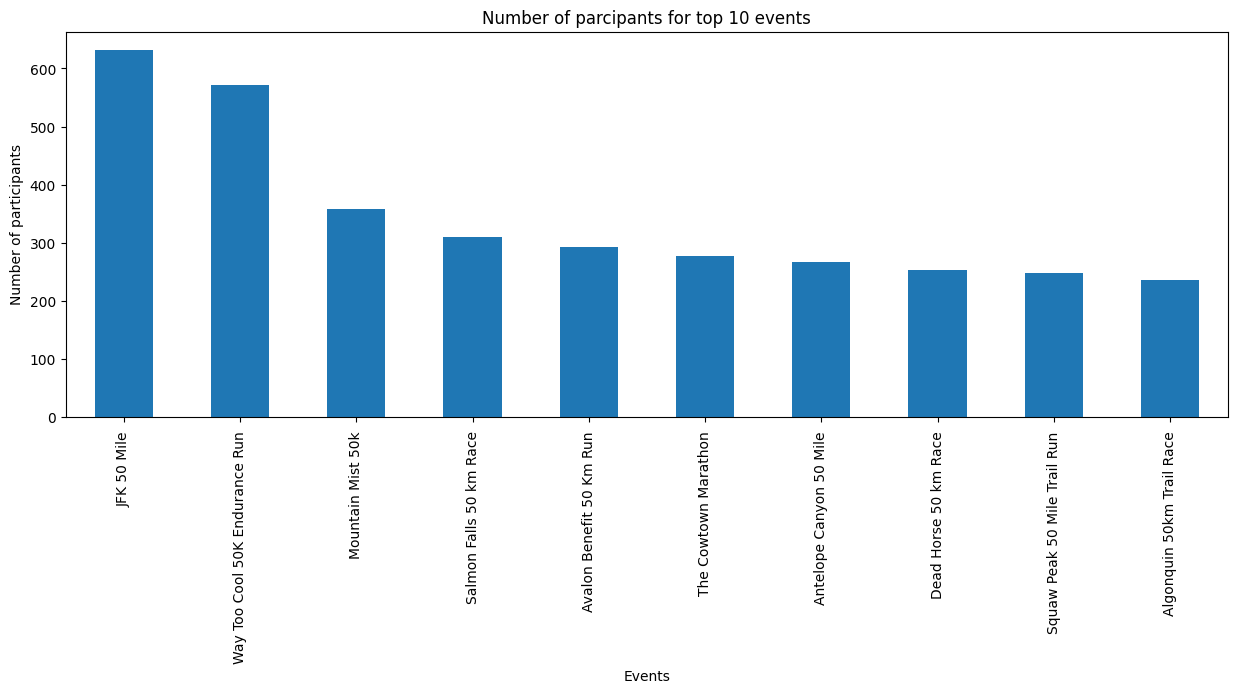

In [110]:
#Number of particiants for each event
participants_plot = race.event_name.value_counts().head(10).plot(kind='bar', title='Number of parcipants for top 10 events', xlabel='Events', ylabel='Number of participants', figsize=(15,5))

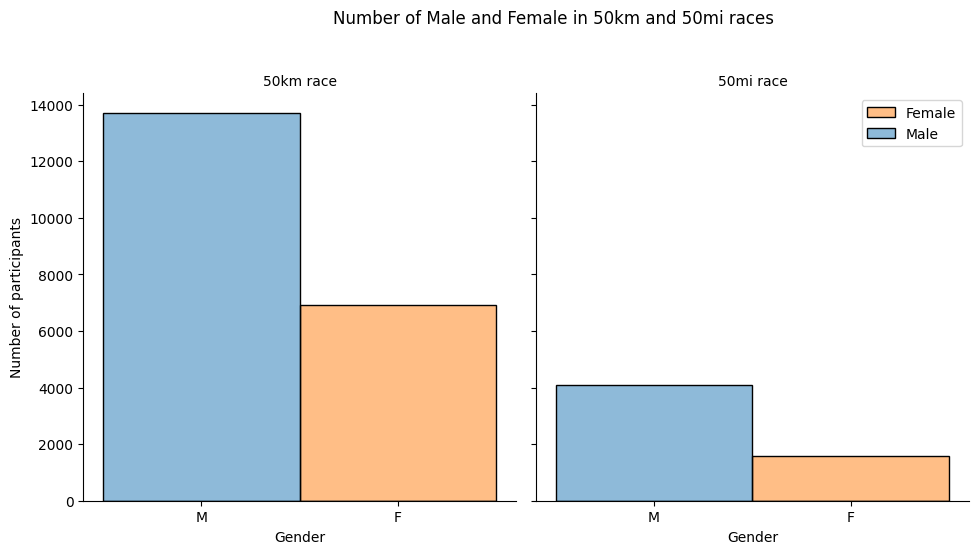

In [111]:
#Number of male/female participants for 50km/50mi race
genders_plot = sns.displot(kind='hist', data=race, x='athlete_gender', hue='athlete_gender', col='event_distance')
genders_plot.fig.suptitle('Number of Male and Female in 50km and 50mi races', y=1.1)
genders_plot.set_titles("{col_name} race")
genders_plot.set(xlabel="Gender",
                    ylabel="Number of participants")
genders_plot.legend.remove()
plt.legend(['Female', 'Male'])


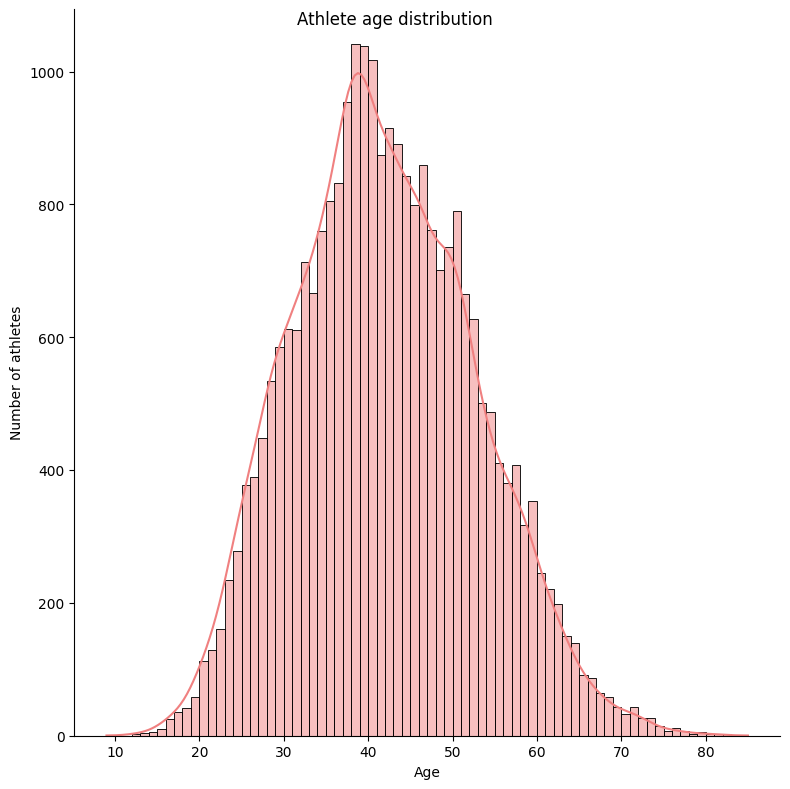

In [112]:
#Athlete age distribution

age_plot = sns.displot(race['athlete_age'], color='lightcoral', kde=True, height=8)
age_plot.fig.suptitle('Athlete age distribution')
age_plot.set(xlabel="Age",
                    ylabel="Number of athletes")


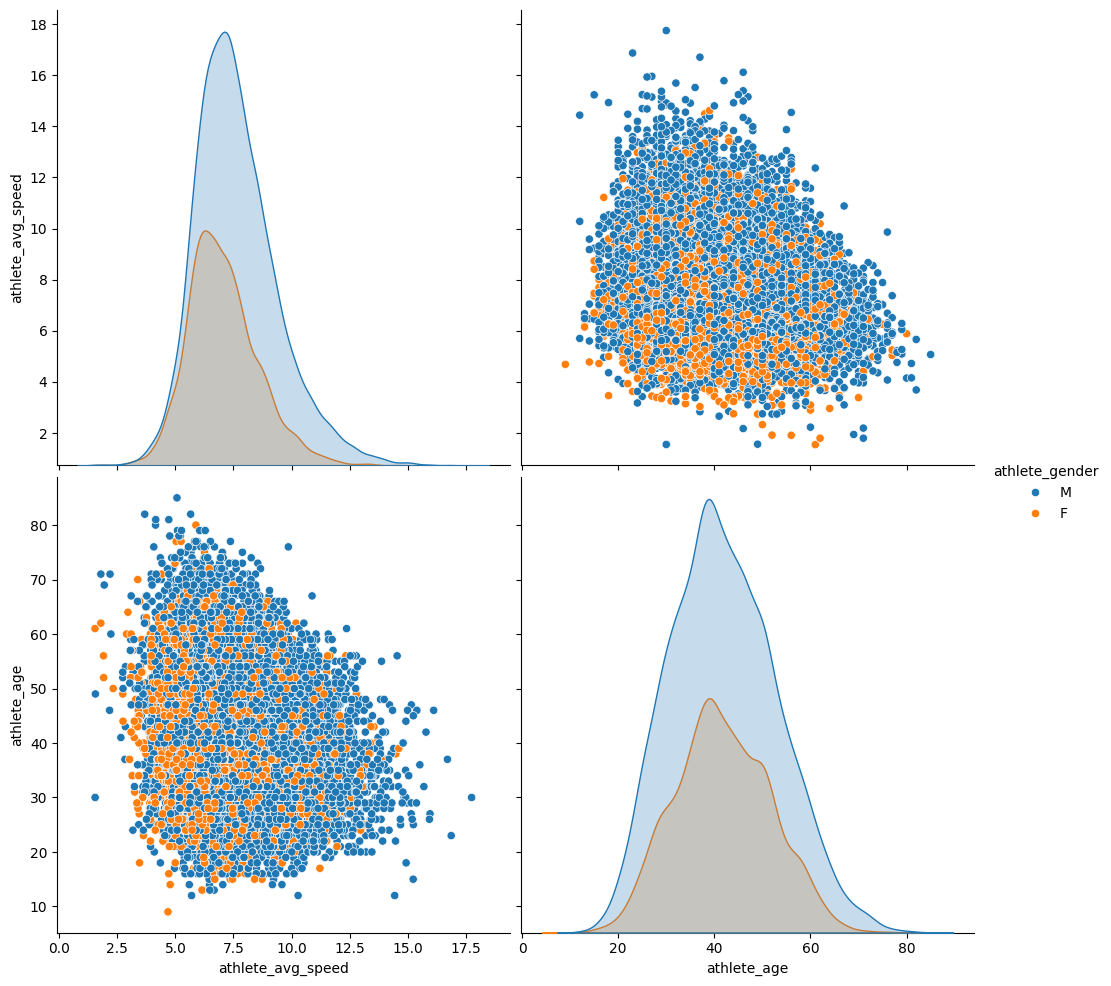

In [113]:
#Pair plot for Average Speed and Athlete Age for both Male and Female
speed_gender_plot = sns.pairplot(race[['athlete_avg_speed', 'athlete_age', 'athlete_gender']], hue='athlete_gender', height=5)

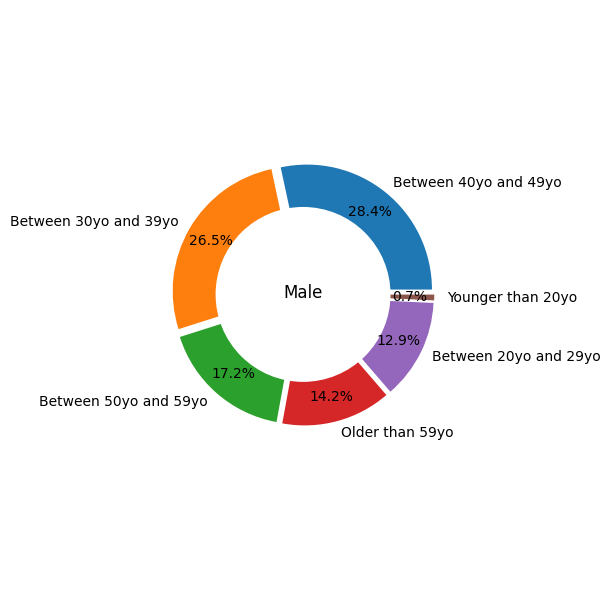

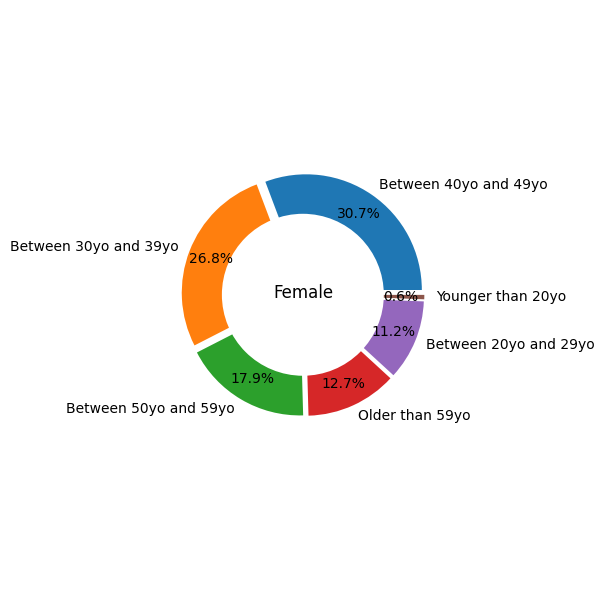

In [114]:
#Different age groups of the participants

def age_grp(age):
    if age < 20:
        return 'Younger than 20yo'
    elif 20 <= age <30:
        return 'Between 20yo and 29yo'
    elif 30 <= age <39:
        return 'Between 30yo and 39yo'
    elif 40 <= age <49:
        return 'Between 40yo and 49yo'
    elif 50 <= age <59:
        return 'Between 50yo and 59yo'
    else:
        return 'Older than 59yo'
    
race['age_grp'] = race['athlete_age'].apply(age_grp)


#Function to create pie charts for both Male and Female
def pie_age_grp(gender):
    
    age_grp_count = race[race['athlete_gender'] == gender].age_grp.value_counts().reset_index() 

    title = ''
    if gender == 'M':
        title = 'Male'    
    else:
        title = 'Female'    
    plt.figure(figsize=(6,6))

    #Plot 
    labels = age_grp_count.age_grp.tolist()
    values = age_grp_count.iloc[:, 1].tolist()
    explode = (0.05,0.05,0.05,0.05,0.05,0.05)
    plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.8, explode = explode)

    #Circle in the middle
    circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circle)

    #Equal aspect ratio ensures that pie is drawn as a circle
    ax = plt.subplot()
    ax.axis('equal')
    plt.tight_layout()
    plt.title(title, y=0.48)
    plt.show()

    
#Plot pie charts
genders = ['M', 'F']
for gender in genders:
    pie_age_grp(gender)




<Axes: title={'center': 'Winning percentage of each age group'}, xlabel='Race distance', ylabel='Wining percentage'>

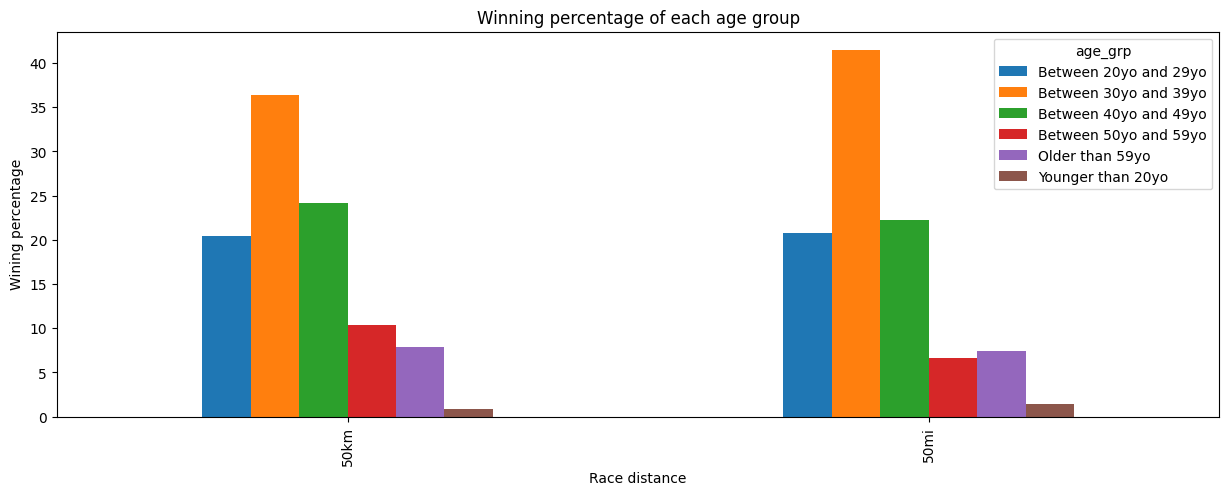

In [115]:
#Create new dataframe - winners_data for winners for each of the event, by selecting the participants with shortest performance time
winners = race.groupby('event_name')['athlete_performance'].min().reset_index()
winners_data = race[(race['event_name'].isin(winners['event_name'])) & 
                    (race['athlete_performance'].isin(winners['athlete_performance']))]

#Plot winning percentage for each age group
win = pd.crosstab(index=winners_data['event_distance'], columns=winners_data['age_grp'], normalize='index')*100
win.plot(kind='bar', title='Winning percentage of each age group', ylabel='Wining percentage', xlabel='Race distance', figsize=(15,5))




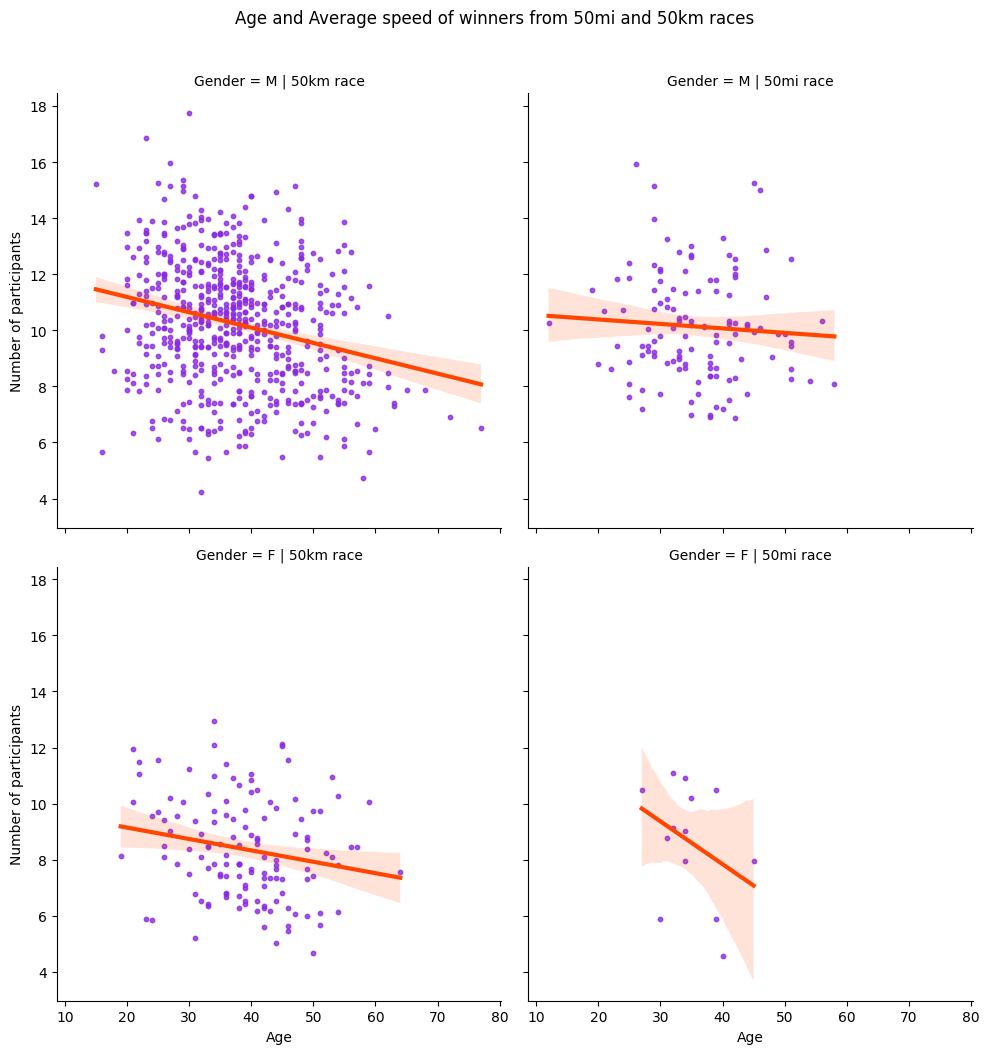

In [116]:

#Age and Average speed of winners for 50mi and 50km races
gender_dist_plot = sns.lmplot(data=winners_data, x='athlete_age', y='athlete_avg_speed', col='event_distance', row='athlete_gender', 
            scatter_kws={"s":10,'color':'blueviolet'}, line_kws={"lw":3,'color':'orangered'})

gender_dist_plot.fig.suptitle('Age and Average speed of winners from 50mi and 50km races', y = 1.05)

gender_dist_plot.set_titles("Gender = {row_name} | {col_name} race")
   
gender_dist_plot.set(xlabel="Age", ylabel="Number of participants")


In [117]:
race

,year_event,event_dates,event_name,event_distance,event_number_of_finishers,athlete_performance,athlete_country,athlete_gender,athlete_avg_speed,athlete_id,athlete_age,age_grp
0,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 03:17:55,USA,M,15.158,71287,29,Between 20yo and 29yo
1,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:02:32,USA,M,12.369,629508,39,Older than 59yo
2,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:07:57,USA,M,12.099,64838,21,Between 20yo and 29yo
3,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:22:02,USA,M,11.449,704450,37,Between 30yo and 39yo
4,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:27:34,USA,M,11.212,810281,43,Between 40yo and 49yo
...,...,...,...,...,...,...,...,...,...,...,...,...
26284,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,0 days 07:07:48,USA,F,7.013,816361,62,Older than 59yo
26285,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,0 days 07:27:22,USA,F,6.706,326469,43,Between 40yo and 49yo
26286,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,0 days 07:27:24,USA,F,6.705,372174,58,Between 50yo and 59yo
26287,2020,2020-10-03,Yankee Springs Fall Trail Run Festival,50km,30,0 days 07:38:30,USA,F,6.543,860349,39,Older than 59yo


### Further Analysis

In [118]:
#Average performance time for each age group
avg_ageGrp_performance = race.groupby('age_grp')['athlete_performance'].mean().dt.round('s').reset_index()
avg_ageGrp_performance = avg_ageGrp_performance.rename(columns={'age_grp' : 'Age Group',
                                'athlete_performance' : 'Average performance'})
avg_ageGrp_performance

,Age Group,Average performance
0,Between 20yo and 29yo,0 days 07:40:42
1,Between 30yo and 39yo,0 days 07:49:46
2,Between 40yo and 49yo,0 days 08:03:00
3,Between 50yo and 59yo,0 days 08:17:01
4,Older than 59yo,0 days 08:25:40
5,Younger than 20yo,0 days 07:52:21


In [119]:
avg_ageGrp_speed = race.groupby('age_grp')['athlete_avg_speed'].mean().round(2).reset_index()
avg_ageGrp_speed= avg_ageGrp_speed.rename(columns={'age_grp' : 'Age Group',
                                'athlete_avg_speed' : 'Average speed'})
avg_ageGrp_speed

,Age Group,Average speed
0,Between 20yo and 29yo,7.92
1,Between 30yo and 39yo,7.72
2,Between 40yo and 49yo,7.38
3,Between 50yo and 59yo,7.11
4,Older than 59yo,7.01
5,Younger than 20yo,7.65


In [120]:
#Average speed for male, female in 50mi and 50km races
avg_gender_speed = race.groupby(['athlete_gender', 'event_distance'])['athlete_avg_speed'].mean().round(2).reset_index()
avg_gender_speed = avg_gender_speed.rename(columns={'athlete_gender' : 'Gender',
                                                    'event_distance' : 'Distance',
                                                    'athlete_avg_speed' : 'Average speed'})
avg_gender_speed

,Gender,Distance,Average speed
0,F,50km,7.09
1,F,50mi,6.83
2,M,50km,7.74
3,M,50mi,7.25


In [121]:
#Average performance time for male, female in 50km and 50mi races
avg_gender_performance = race.groupby(['athlete_gender', 'event_distance'])['athlete_performance'].mean().dt.round('s').reset_index()
avg_gender_performance = avg_gender_performance.rename(columns={'athlete_gender' : 'gender',
                                                                'event_distance' : 'distance',
                                                                'athlete_performance': 'Average performance time'})
avg_gender_performance

,gender,distance,Average performance time
0,F,50km,0 days 07:23:58
1,F,50mi,0 days 12:13:27
2,M,50km,0 days 06:48:54
3,M,50mi,0 days 11:36:13


In [122]:
#Winners have won multiple races
multiple_races_winners = winners_data['athlete_id'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'athlete_id': 'Athlete ID',
                                                                                                                              'count': 'Number of events won'})
multiple_races_winners

,Athlete ID,Number of events won
0,50990,4
1,202038,4
2,39348,4
3,39341,3
4,231617,3
...,...,...
813,317366,1
814,242025,1
815,388438,1
816,137889,1


In [123]:
#Number of finishers in 50km and 50mi races
num_finisher = race.groupby('event_distance')['event_number_of_finishers'].count().reset_index().rename(columns={'event_distance': 'Distance',
                                                                                                                 'event_number_of_finishers' : 'Number of finishers'})
num_finisher

,Distance,Number of finishers
0,50km,20632
1,50mi,5657


In [124]:
#Number of finishers in each age group for 50km race
num_finisher_ageGrp_50km = race[race['event_distance'] == '50km'].groupby(['event_distance', 'age_grp'])['event_number_of_finishers'].count().reset_index().rename(columns={'event_distance': 'Distance',
                                                                                                                 'event_number_of_finishers' : 'Number of finishers',
                                                                                                                 'age_grp' : 'Age group'})

num_finisher_ageGrp_50km

,Distance,Age group,Number of finishers
0,50km,Between 20yo and 29yo,2482
1,50km,Between 30yo and 39yo,5370
2,50km,Between 40yo and 49yo,6043
3,50km,Between 50yo and 59yo,3697
4,50km,Older than 59yo,2897
5,50km,Younger than 20yo,143


In [125]:
num_finisher_ageGrp_50mi = race[race['event_distance'] == '50mi'].groupby(['event_distance', 'age_grp'])['event_number_of_finishers'].count().reset_index().rename(columns={'event_distance': 'Distance',
                                                                                                                 'event_number_of_finishers' : 'Number of finishers',
                                                                                                                 'age_grp' : 'Age group'})

num_finisher_ageGrp_50mi

,Distance,Age group,Number of finishers
0,50mi,Between 20yo and 29yo,769
1,50mi,Between 30yo and 39yo,1627
2,50mi,Between 40yo and 49yo,1617
3,50mi,Between 50yo and 59yo,890
4,50mi,Older than 59yo,713
5,50mi,Younger than 20yo,41


In [126]:
#Participants who participated in both 50km and 50mi races
participants_50km  = race[race['event_distance'] == '50km']['athlete_id'].reset_index()
participants_50mi = race[race['event_distance'] == '50mi']['athlete_id'].reset_index()

participants_both = participants_50km[participants_50km['athlete_id'].isin(participants_50mi['athlete_id'])]
participants_results = race[race['athlete_id'].isin(participants_both['athlete_id'])]
